# Bike Sharing Network

(Title of our awesome project, created by Niki, Georgios and Lena)

In [1]:
# first importing neccessary packages

import pandas as pd
import requests
import json
import matplotlib
%matplotlib inline
from pandas.io.json import json_normalize

# import folium package for mapping:

import folium

### Import API dataset

In [2]:
url = "http://api.citybik.es/v2/networks"
r = requests.get(url)
r.status_code

200

In [3]:
df = pd.DataFrame(r.json()['networks'])

### Examine API dataset

In [4]:
df.head()

,company,href,id,location,name,source,license,gbfs_href
0,[ЗАО «СитиБайк»],/v2/networks/velobike-moscow,velobike-moscow,"{'city': 'Moscow', 'country': 'RU', 'latitude'...",Velobike,NaN,NaN,NaN
1,[Gobike A/S],/v2/networks/bycyklen,bycyklen,"{'city': 'Copenhagen', 'country': 'DK', 'latit...",Bycyklen,NaN,NaN,NaN
2,[Gobike A/S],/v2/networks/nu-connect,nu-connect,"{'city': 'Utrecht', 'country': 'NL', 'latitude...",Nu-Connect,NaN,NaN,NaN
3,[Urban Infrastructure Partner],/v2/networks/baerum-bysykkel,baerum-bysykkel,"{'city': 'Bærum', 'country': 'NO', 'latitude':...",Bysykkel,NaN,NaN,NaN
4,[Gobike A/S],/v2/networks/bysykkelen,bysykkelen,"{'city': 'Stavanger', 'country': 'NO', 'latitu...",Bysykkelen,NaN,NaN,NaN


In [5]:
df.shape

(644, 8)

### Clean dataset

In [6]:
# Unnest the 'location' column

df2 = json_normalize(df['location'])
df3 = df.merge(df2, left_index=True, right_index=True)

# Rename and lower the 'country' column to be in accordance with the other dataset

df3 = df3.rename(columns = {"country": "Country", 
                            "city": "City",
                            "latitude": "Latitude",
                            "longitude": "Longitude"})
df3["Country"] = pd.Series(df3.Country).str.lower()

# Drop columns which contain only NaN's or unnecessary values for our investigation

df_final = df3.drop(['location','source','license','gbfs_href'],axis=1)

### Cleaned API dataframe

In [7]:
df_final.head()

,company,href,id,name,City,Country,Latitude,Longitude
0,[ЗАО «СитиБайк»],/v2/networks/velobike-moscow,velobike-moscow,Velobike,Moscow,ru,55.750000,37.616667
1,[Gobike A/S],/v2/networks/bycyklen,bycyklen,Bycyklen,Copenhagen,dk,55.673582,12.564984
2,[Gobike A/S],/v2/networks/nu-connect,nu-connect,Nu-Connect,Utrecht,nl,52.117000,5.067000
3,[Urban Infrastructure Partner],/v2/networks/baerum-bysykkel,baerum-bysykkel,Bysykkel,Bærum,no,59.894550,10.546343
4,[Gobike A/S],/v2/networks/bysykkelen,bysykkelen,Bysykkelen,Stavanger,no,58.969975,5.733107


### Import csv dataset from open source

In [8]:
import pandas as pd

df4 = pd.read_csv("worldcitiespop.csv", low_memory=False)

### Examine csv dataframe

In [9]:
df4.head()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
0,ad,aixas,Aixàs,06,NaN,42.483333,1.466667
1,ad,aixirivali,Aixirivali,06,NaN,42.466667,1.500000
2,ad,aixirivall,Aixirivall,06,NaN,42.466667,1.500000
3,ad,aixirvall,Aixirvall,06,NaN,42.466667,1.500000
4,ad,aixovall,Aixovall,06,NaN,42.466667,1.483333


In [10]:
df4.shape

(3173958, 7)

### Clean csv dataframe

In [11]:
# Dropping irrelevant and na values
df5 = df4.drop(columns=["City", "Region"]).dropna()
df6 = df5.rename(columns={"AccentCity": "City"})

# Remove duplicates and reseting index
df7 = df6.drop_duplicates()
df2_final = df7.reset_index(drop=True)

### Cleaned csv dataframe

In [12]:
df2_final.head()

,Country,City,Population,Latitude,Longitude
0,ad,Andorra la Vella,20430.0,42.500000,1.516667
1,ad,Canillo,3292.0,42.566667,1.600000
2,ad,Encamp,11224.0,42.533333,1.583333
3,ad,La Massana,7211.0,42.550000,1.516667
4,ad,Les Escaldes,15854.0,42.500000,1.533333


### Merge two datasets

In [13]:
ultimate_df = df_final.merge(df2_final, left_on=['City', 'Country'], 
                                      right_on=['City', 'Country'], how='left')

### Clean ultimate dataframe

In [14]:
ultimate_df = ultimate_df.rename(columns={'Latitude_y': 'City Latitude',
                                    'Longitude_y': 'City Longitude',    
                                    'Latitude_x': 'Company Latitude',
                                    'Longitude_x': 'Company Longitude',
                                    'company': 'Company',
                                    'name': 'Name'})

In [15]:
# Remove two rows that were duplicates

ultimate_df.drop([600, 603], inplace=True)

In [16]:
# Check if the duplicate 'City' values have actual differeces in other columns

ultimate_df[ultimate_df["City"]=="London"]

,Company,href,id,Name,City,Country,Company Latitude,Company Longitude,Population,City Latitude,City Longitude
74,"[PBSC, Serco Group plc]",/v2/networks/santander-cycles,santander-cycles,Santander Cycles,London,gb,51.511214,-0.119824,7421228.0,51.514125,-0.093689
493,[Nextbike GmbH],/v2/networks/nextbike-london,nextbike-london,Nextbike,London,gb,51.486200,-0.119660,7421228.0,51.514125,-0.093689


In [17]:
# Reset index of the final dataframe

ultimate_df.reset_index(drop=True)

,Company,href,id,Name,City,Country,Company Latitude,Company Longitude,Population,City Latitude,City Longitude
0,[ЗАО «СитиБайк»],/v2/networks/velobike-moscow,velobike-moscow,Velobike,Moscow,ru,55.750000,37.616667,10381288.0,55.752222,37.615556
1,[Gobike A/S],/v2/networks/bycyklen,bycyklen,Bycyklen,Copenhagen,dk,55.673582,12.564984,1089958.0,55.666667,12.583333
2,[Gobike A/S],/v2/networks/nu-connect,nu-connect,Nu-Connect,Utrecht,nl,52.117000,5.067000,267044.0,52.093813,5.119095
3,[Urban Infrastructure Partner],/v2/networks/baerum-bysykkel,baerum-bysykkel,Bysykkel,Bærum,no,59.894550,10.546343,NaN,NaN,NaN
4,[Gobike A/S],/v2/networks/bysykkelen,bysykkelen,Bysykkelen,Stavanger,no,58.969975,5.733107,173535.0,58.966667,5.750000
...,...,...,...,...,...,...,...,...,...,...,...
639,[Nextbike GmbH],/v2/networks/rowerowe-lodzkie-rl-lodz-rl,rowerowe-lodzkie-rl-lodz-rl,Rowerowe Łódzkie,Łódź,pl,51.767400,19.457500,NaN,NaN,NaN
640,[Nextbike GmbH],/v2/networks/nextbike-odesa,nextbike-odesa,Nextbike,Odesa,ua,46.467200,30.716400,1001553.0,46.463934,30.738551
641,[Nextbike GmbH],/v2/networks/nextbike-alvsjo,nextbike-alvsjo,Nextbike,Älvsjö,de,59.274500,18.005000,NaN,NaN,NaN
642,[Nextbike GmbH],/v2/networks/nextbike-wittenberge,nextbike-wittenberge,Nextbike,Wittenberge,de,52.995200,11.751700,20322.0,53.000000,11.750000


### Visualization in plots

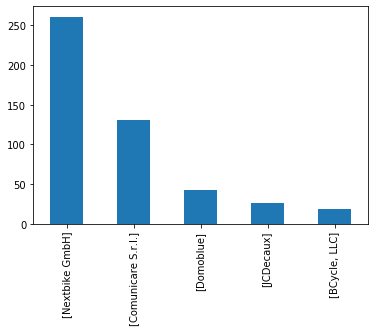

In [18]:
# Check the 5 most famous bike sharing companies and plot them

ultimate_df.Company.value_counts()[:5]
ultimate_df.Company.value_counts()[:5].plot(kind='bar');

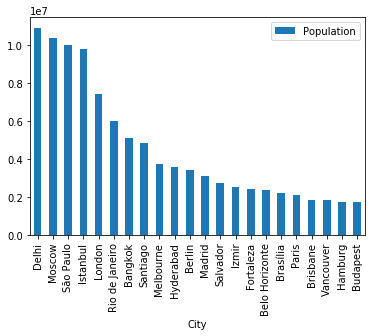

In [19]:
# Find the most populated cities worldwide and plot them

top_city_population= ultimate_df[["Population","City"]].sort_values("Population",ascending= False).head(25)
top_city_population.drop_duplicates().plot(x="City", kind='bar');

In [20]:
# Find the 20 most populated cities worldwide and the bike sharing companies located there

top_city_population2 = ultimate_df[["Population","Company", "City"]].sort_values("Population",ascending= False).head(20) 

In [21]:
top_city_population2

,Population,Company,City
605,10928270.0,[Nextbike GmbH],Delhi
0,10381288.0,[ЗАО «СитиБайк»],Moscow
193,10021437.0,"[Tembici, PBSC Urban Solutions]",São Paulo
121,10021437.0,[PegBike],São Paulo
278,9797536.0,[Baksi Bike Sharing System],Istanbul
493,7421228.0,[Nextbike GmbH],London
74,7421228.0,"[PBSC, Serco Group plc]",London
194,6023742.0,"[Tembici, PBSC Urban Solutions]",Rio de Janeiro
69,5104475.0,[BTS Group Holdings],Bangkok
201,4837248.0,"[Tembici, PBSC Urban Solutions]",Santiago


### Create function for fun

In [22]:
# This little extra is a function that based on the city input returns the companies 
# that have bike sharing functions in the city

def findcompany(city):
    return ultimate_df[ultimate_df["City"]==city]["Company"]

In [23]:
# Test the function

findcompany("London")

74     [PBSC, Serco Group plc]
493            [Nextbike GmbH]
Name: Company, dtype: object

### Export merged csv file

In [24]:
final_csv = ultimate_df.to_csv('output/merged_df.csv', sep=',', index=False)

### Visualization as map

In [25]:
# Import csv file
# this is our exported merged csv file which is reassigned to 'merged':

merged = pd.read_csv('output/merged_df.csv')

In [26]:
# create dict to extract 'Company', 'Latitude', 'Longitude' for mapping:

company_values=list(merged['Name'])

latitude_values=list(merged['Company Latitude'])

longitude_values=list(merged['Company Longitude'])


dict_to_map={'Longitude':longitude_values,
             'Latitude':latitude_values,
             'Company':company_values}

In [27]:
# create empty map:

world_map = folium.Map(location=[0, 0], zoom_start=2)


# create Data Frame to assign latitude, Longitude and Company to it:

data = pd.DataFrame(dict_to_map)

longitude = list(dict_to_map['Longitude'])
latitude = list(dict_to_map['Latitude'])
company = list()

# add marker to map to show companys worldwide:

for i in range(len(data)):
    folium.Marker((latitude[i], longitude[i]), popup = data.iloc[i]['Company']).add_to(world_map)
    
world_map.save('output/world_map.html')


# display map with interactive marker for each bike shop of the bike companies

world_map